## Problem Statement
CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

Data Collection Phase I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

Model Building Phase After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_uc = pd.read_csv("Used_Cars_Data.csv",index_col=0)
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2016 Honda City,6.50 Lakh,i VTEC V,"88,036 kms",Petrol,Manual
1,2017 Renault KWID,3.90 Lakh,1.0 RXT Optional AT 2016-2019,"45,567 kms",Petrol,Automatic
2,2014 Maruti Alto K10,2.76 Lakh,2010-2014 VXI,"80,293 kms",Petrol,Manual
3,2021 Nissan Kicks,15.10 Lakh,1.3 Turbo XV Pre CVT,"6,660 kms",Petrol,Automatic
4,2021 Toyota Urban cruiser,10.20 Lakh,High,"5,467 kms",Petrol,Manual
...,...,...,...,...,...,...
75,2021 BMW X1,43.75 Lakh,sDrive20i SportX,"8,000 kms",Petrol,Automatic
76,2016 Mercedes-Benz S-Class,1.61 Cr,AMG S63 Coupe,"16,000 kms",Petrol,Automatic
77,2021 BMW 3 Series Gran Limousine,53.75 Lakh,320Ld Iconic Edition,"12,000 kms",Diesel,Automatic
78,2020 Porsche Macan,79.50 Lakh,3.0 Twin Turbo V6,"16,000 kms",Petrol,Automatic


## PREPROCESSING AND EXPLORATORY DATA ANALYSIS(EDA)

In [3]:
# Checking shape of my dataset
df_uc.shape

(480, 6)

In [4]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant'], dtype='object')

In [5]:
df_uc.dtypes

Brand         object
Price         object
Model         object
KMS_driven    object
Fuel          object
Variant       object
dtype: object

In [6]:
df_uc['Price']

0      6.50 Lakh
1      3.90 Lakh
2      2.76 Lakh
3     15.10 Lakh
4     10.20 Lakh
         ...    
75    43.75 Lakh
76       1.61 Cr
77    53.75 Lakh
78    79.50 Lakh
79       1.18 Cr
Name: Price, Length: 480, dtype: object

In [7]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 79
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       480 non-null    object
 1   Price       480 non-null    object
 2   Model       480 non-null    object
 3   KMS_driven  480 non-null    object
 4   Fuel        480 non-null    object
 5   Variant     480 non-null    object
dtypes: object(6)
memory usage: 26.2+ KB


In [8]:
# Value counts of each column.
for i in df_uc.columns:
        print(df_uc[i].value_counts())
        print('****************************************')

2021 BMW 3 Series Gran Limousine    16
2016 Mercedes-Benz S-Class          16
2021 BMW X1                         16
2020 BMW X7                         16
2018 Hyundai Creta                  16
                                    ..
2017 Hyundai Grand i10               4
2018 Hyundai Verna                   4
2018 Ford Aspire                     4
2016 Hyundai EON                     4
2017 Maruti Ignis                    4
Name: Brand, Length: 75, dtype: int64
****************************************
53.75 Lakh    16
1.61 Cr       16
43.75 Lakh    16
1.18 Cr       16
79.50 Lakh    12
              ..
5.63 Lakh      4
13.15 Lakh     4
9.05 Lakh      4
7.77 Lakh      4
7.85 Lakh      4
Name: Price, Length: 88, dtype: int64
****************************************
1.6 VTVT SX Plus        20
320Ld Iconic Edition    16
AMG S63 Coupe           16
sDrive20i SportX        16
xDrive 40i              16
                        ..
G BSIV                   4
VL AT                    4
Sportz    

## Data Extraction

In [9]:
# Extracting 'Price' values from Price
df_uc['Price'] = df_uc['Price'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2016 Honda City,6.50,i VTEC V,"88,036 kms",Petrol,Manual
1,2017 Renault KWID,3.90,1.0 RXT Optional AT 2016-2019,"45,567 kms",Petrol,Automatic
2,2014 Maruti Alto K10,2.76,2010-2014 VXI,"80,293 kms",Petrol,Manual
3,2021 Nissan Kicks,15.10,1.3 Turbo XV Pre CVT,"6,660 kms",Petrol,Automatic
4,2021 Toyota Urban cruiser,10.20,High,"5,467 kms",Petrol,Manual
...,...,...,...,...,...,...
75,2021 BMW X1,43.75,sDrive20i SportX,"8,000 kms",Petrol,Automatic
76,2016 Mercedes-Benz S-Class,1.61,AMG S63 Coupe,"16,000 kms",Petrol,Automatic
77,2021 BMW 3 Series Gran Limousine,53.75,320Ld Iconic Edition,"12,000 kms",Diesel,Automatic
78,2020 Porsche Macan,79.50,3.0 Twin Turbo V6,"16,000 kms",Petrol,Automatic


In [10]:
# Extracting 'KMS_driven' from KMS_driven
df_uc['KMS_driven'] = df_uc['KMS_driven'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2016 Honda City,6.50,i VTEC V,"88,036",Petrol,Manual
1,2017 Renault KWID,3.90,1.0 RXT Optional AT 2016-2019,"45,567",Petrol,Automatic
2,2014 Maruti Alto K10,2.76,2010-2014 VXI,"80,293",Petrol,Manual
3,2021 Nissan Kicks,15.10,1.3 Turbo XV Pre CVT,"6,660",Petrol,Automatic
4,2021 Toyota Urban cruiser,10.20,High,"5,467",Petrol,Manual
...,...,...,...,...,...,...
75,2021 BMW X1,43.75,sDrive20i SportX,"8,000",Petrol,Automatic
76,2016 Mercedes-Benz S-Class,1.61,AMG S63 Coupe,"16,000",Petrol,Automatic
77,2021 BMW 3 Series Gran Limousine,53.75,320Ld Iconic Edition,"12,000",Diesel,Automatic
78,2020 Porsche Macan,79.50,3.0 Twin Turbo V6,"16,000",Petrol,Automatic


In [11]:
# Extracting Manufacturing Year from Brand
df_uc['Manuf_Year'] = df_uc['Brand'].str.split().str[0]
df_uc['Brand'] = df_uc['Brand'].str.split().str[1]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,Honda,6.50,i VTEC V,"88,036",Petrol,Manual,2016
1,Renault,3.90,1.0 RXT Optional AT 2016-2019,"45,567",Petrol,Automatic,2017
2,Maruti,2.76,2010-2014 VXI,"80,293",Petrol,Manual,2014
3,Nissan,15.10,1.3 Turbo XV Pre CVT,"6,660",Petrol,Automatic,2021
4,Toyota,10.20,High,"5,467",Petrol,Manual,2021
...,...,...,...,...,...,...,...
75,BMW,43.75,sDrive20i SportX,"8,000",Petrol,Automatic,2021
76,Mercedes-Benz,1.61,AMG S63 Coupe,"16,000",Petrol,Automatic,2016
77,BMW,53.75,320Ld Iconic Edition,"12,000",Diesel,Automatic,2021
78,Porsche,79.50,3.0 Twin Turbo V6,"16,000",Petrol,Automatic,2020


In [12]:
# Converting object data type columns to float data type
df_uc = df_uc.astype({'Price':'float', 'Manuf_Year':'int'})

In [13]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

In [14]:
df_uc.isnull().sum()

Brand         0
Price         0
Model         0
KMS_driven    0
Fuel          0
Variant       0
Manuf_Year    0
dtype: int64

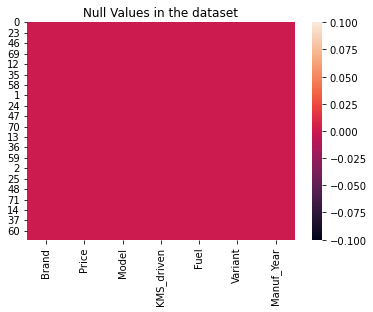

In [15]:
# Visualizing null values in the dataset
sns.heatmap(df_uc.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [16]:
df_uc.describe()

,Price,Manuf_Year
count,480.000000,480.000000
mean,14.069417,2018.325000
std,17.306936,1.973361
min,1.180000,2014.000000
25%,5.562500,2017.000000
50%,8.235000,2018.000000
75%,12.170000,2020.000000
max,79.500000,2022.000000


In [17]:
#Checking for empty observations in target column
df_uc.loc[df_uc['Price'] == " "]

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year


## DATA VISUALIZATION
## Univariate analysis

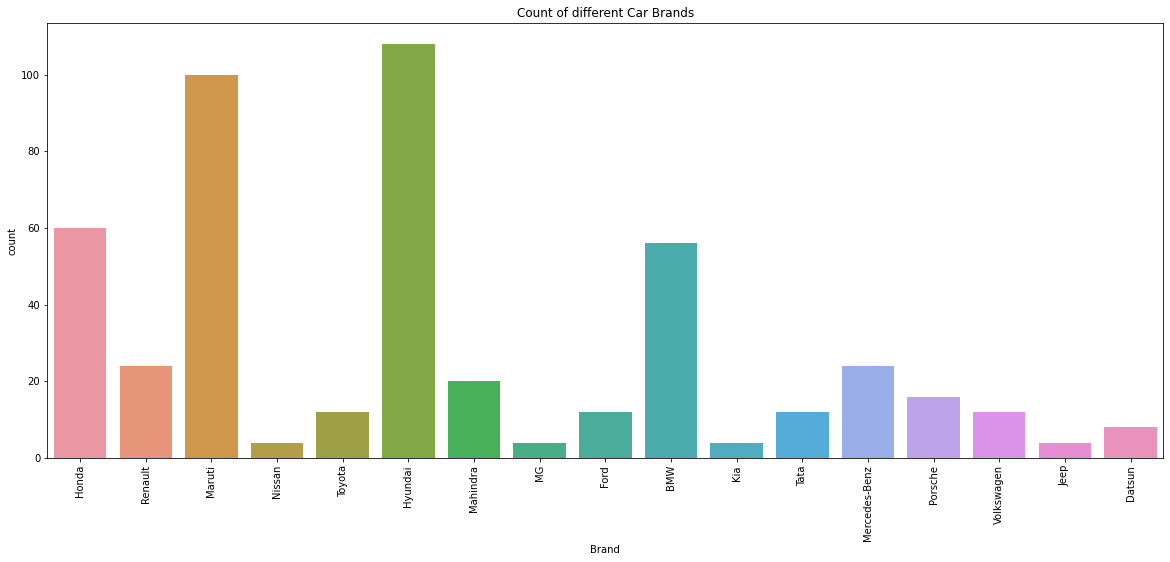

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(df_uc["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Hyundai,Maruti,Honda,Renault,Tata,Toyoto are most used cars

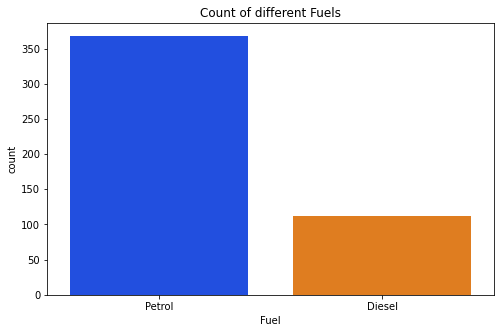

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df_uc["Fuel"],palette='bright')
plt.title("Count of different Fuels")
plt.show()

The major type of fuel is petrol followed by diesel

Automatic    252
Manual       228
Name: Variant, dtype: int64


<AxesSubplot:ylabel='Variant'>

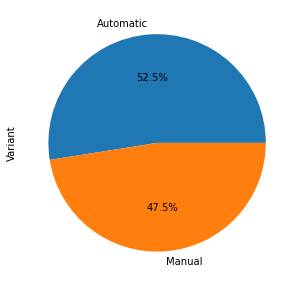

In [20]:
plt.figure(figsize=(10,5))
print(df_uc['Variant'].value_counts())
df_uc['Variant'].value_counts().plot.pie(autopct='%1.1f%%')

65% are manual nd 35% are automatic

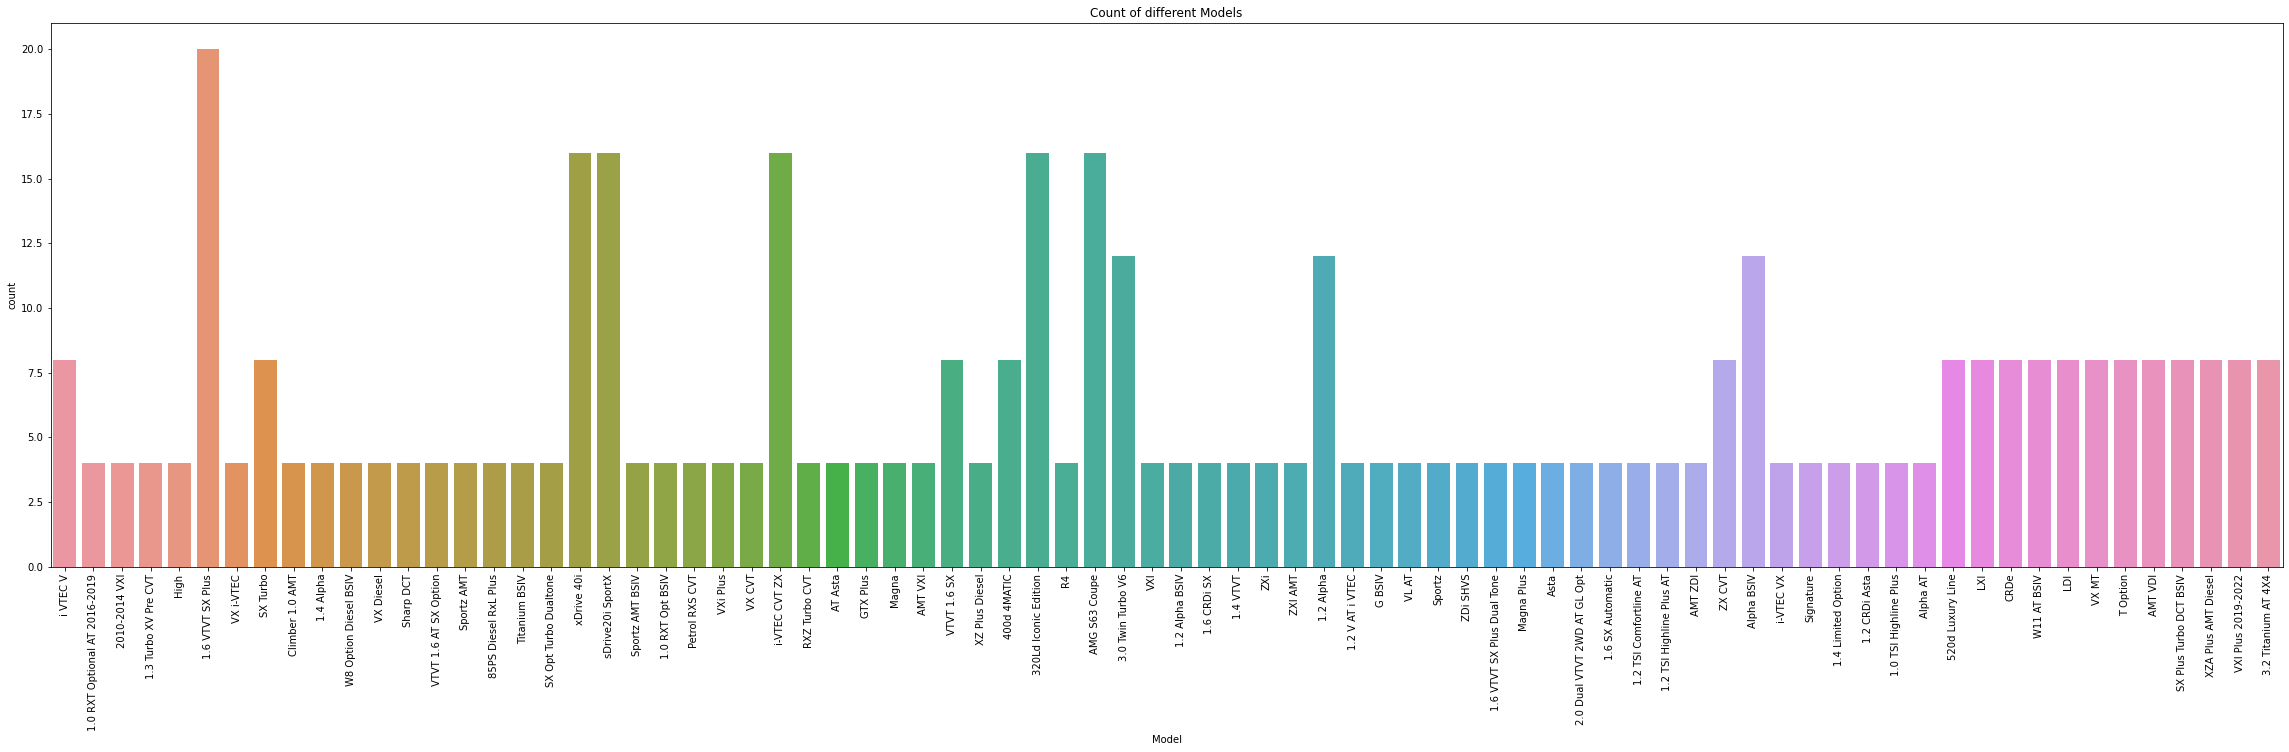

In [21]:
plt.figure(figsize=[40,10])
sns.countplot(df_uc['Model'])
plt.title("Count of different Models")
plt.xticks(rotation=90)
plt.show()

The count of VXI, LXI, VXI BS IV, 1.2 Delta & 1.2 Alpha are highest among all the models.

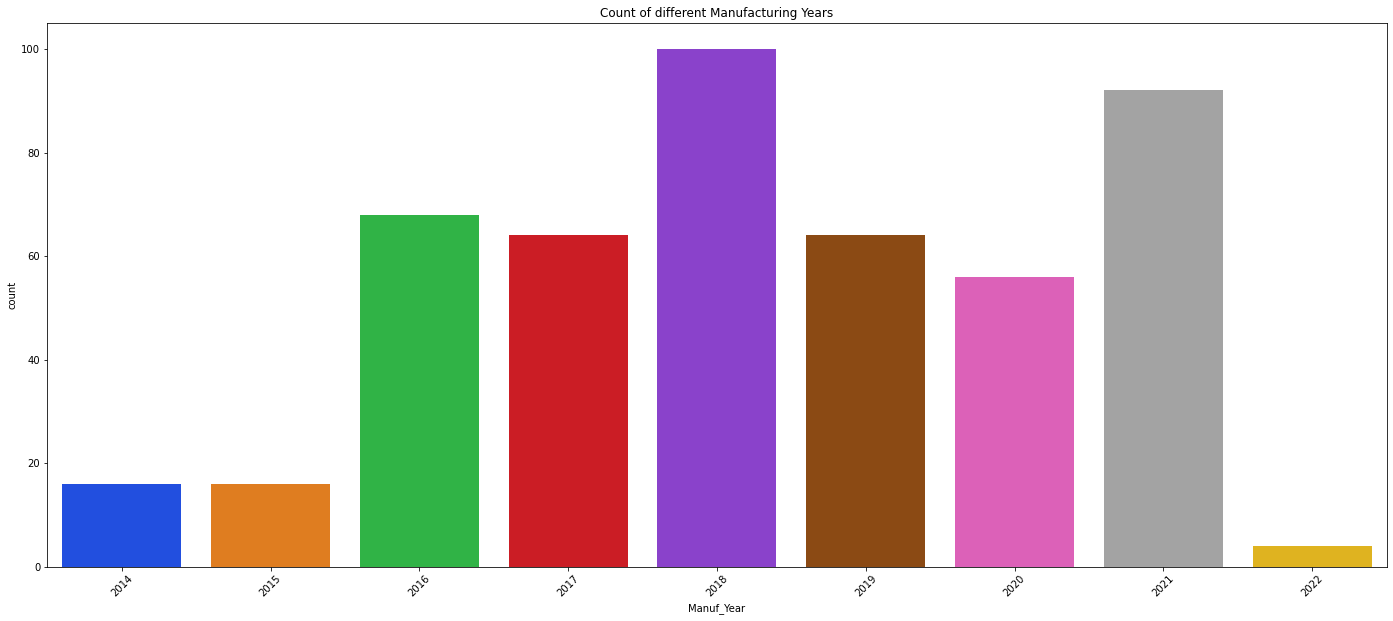

In [22]:
plt.figure(figsize=[24,10])
sns.countplot(df_uc['Manuf_Year'],palette='bright')
plt.title("Count of different Manufacturing Years")
plt.xticks(rotation=45)
plt.show()

Most of the used cars are manufactured in 2018,2020,2019,2017,2015,2021

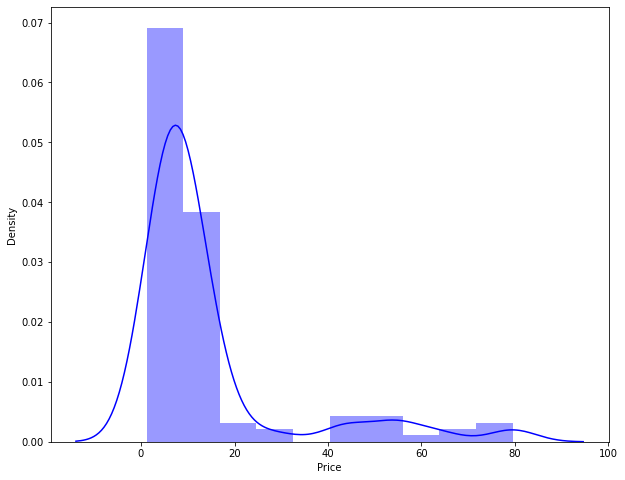

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df_uc["Price"],bins=10,color='Blue')
plt.show()

The distribution is normal but skewed is right

## BIVARIATE ANALYSIS

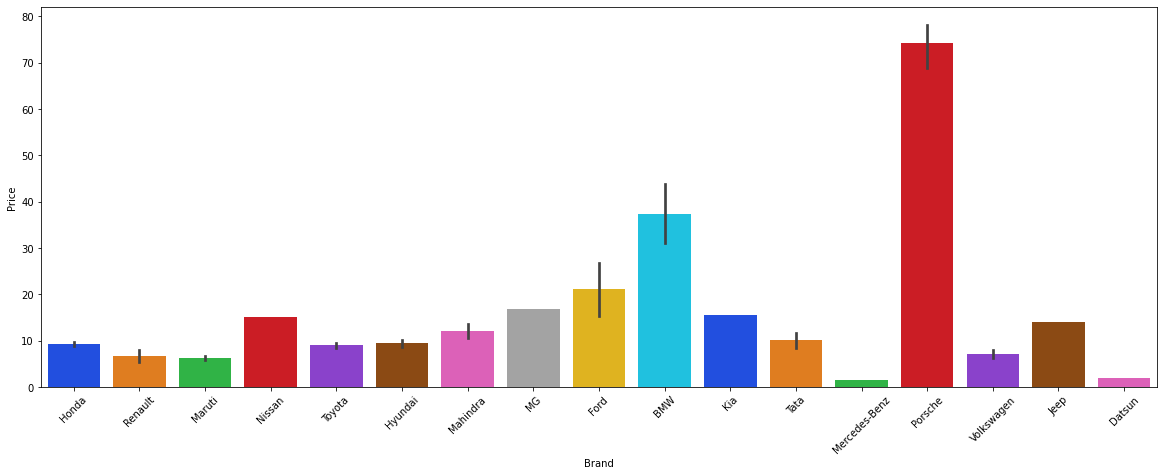

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df_uc,palette='bright')
plt.xticks(rotation=45)
plt.show();

PRICE VS BAND: Most of the used cars are of the Maruti Brand. The Prices of Maruti, Mercedes Benz & Audi are hig

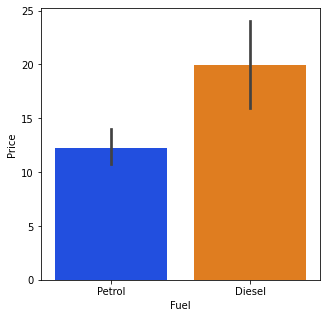

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df_uc,palette='bright')
plt.show();

PRICEVSFUEL:Most of the used car are diesel followed by petrol

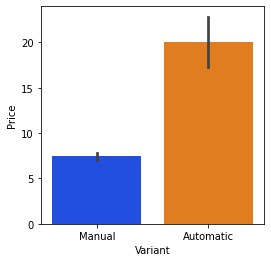

In [26]:
plt.figure(figsize=(4,4))
sns.barplot(x='Variant',y='Price',data=df_uc,palette='bright')
plt.show();

Most of the used cars are automatic followed by manual

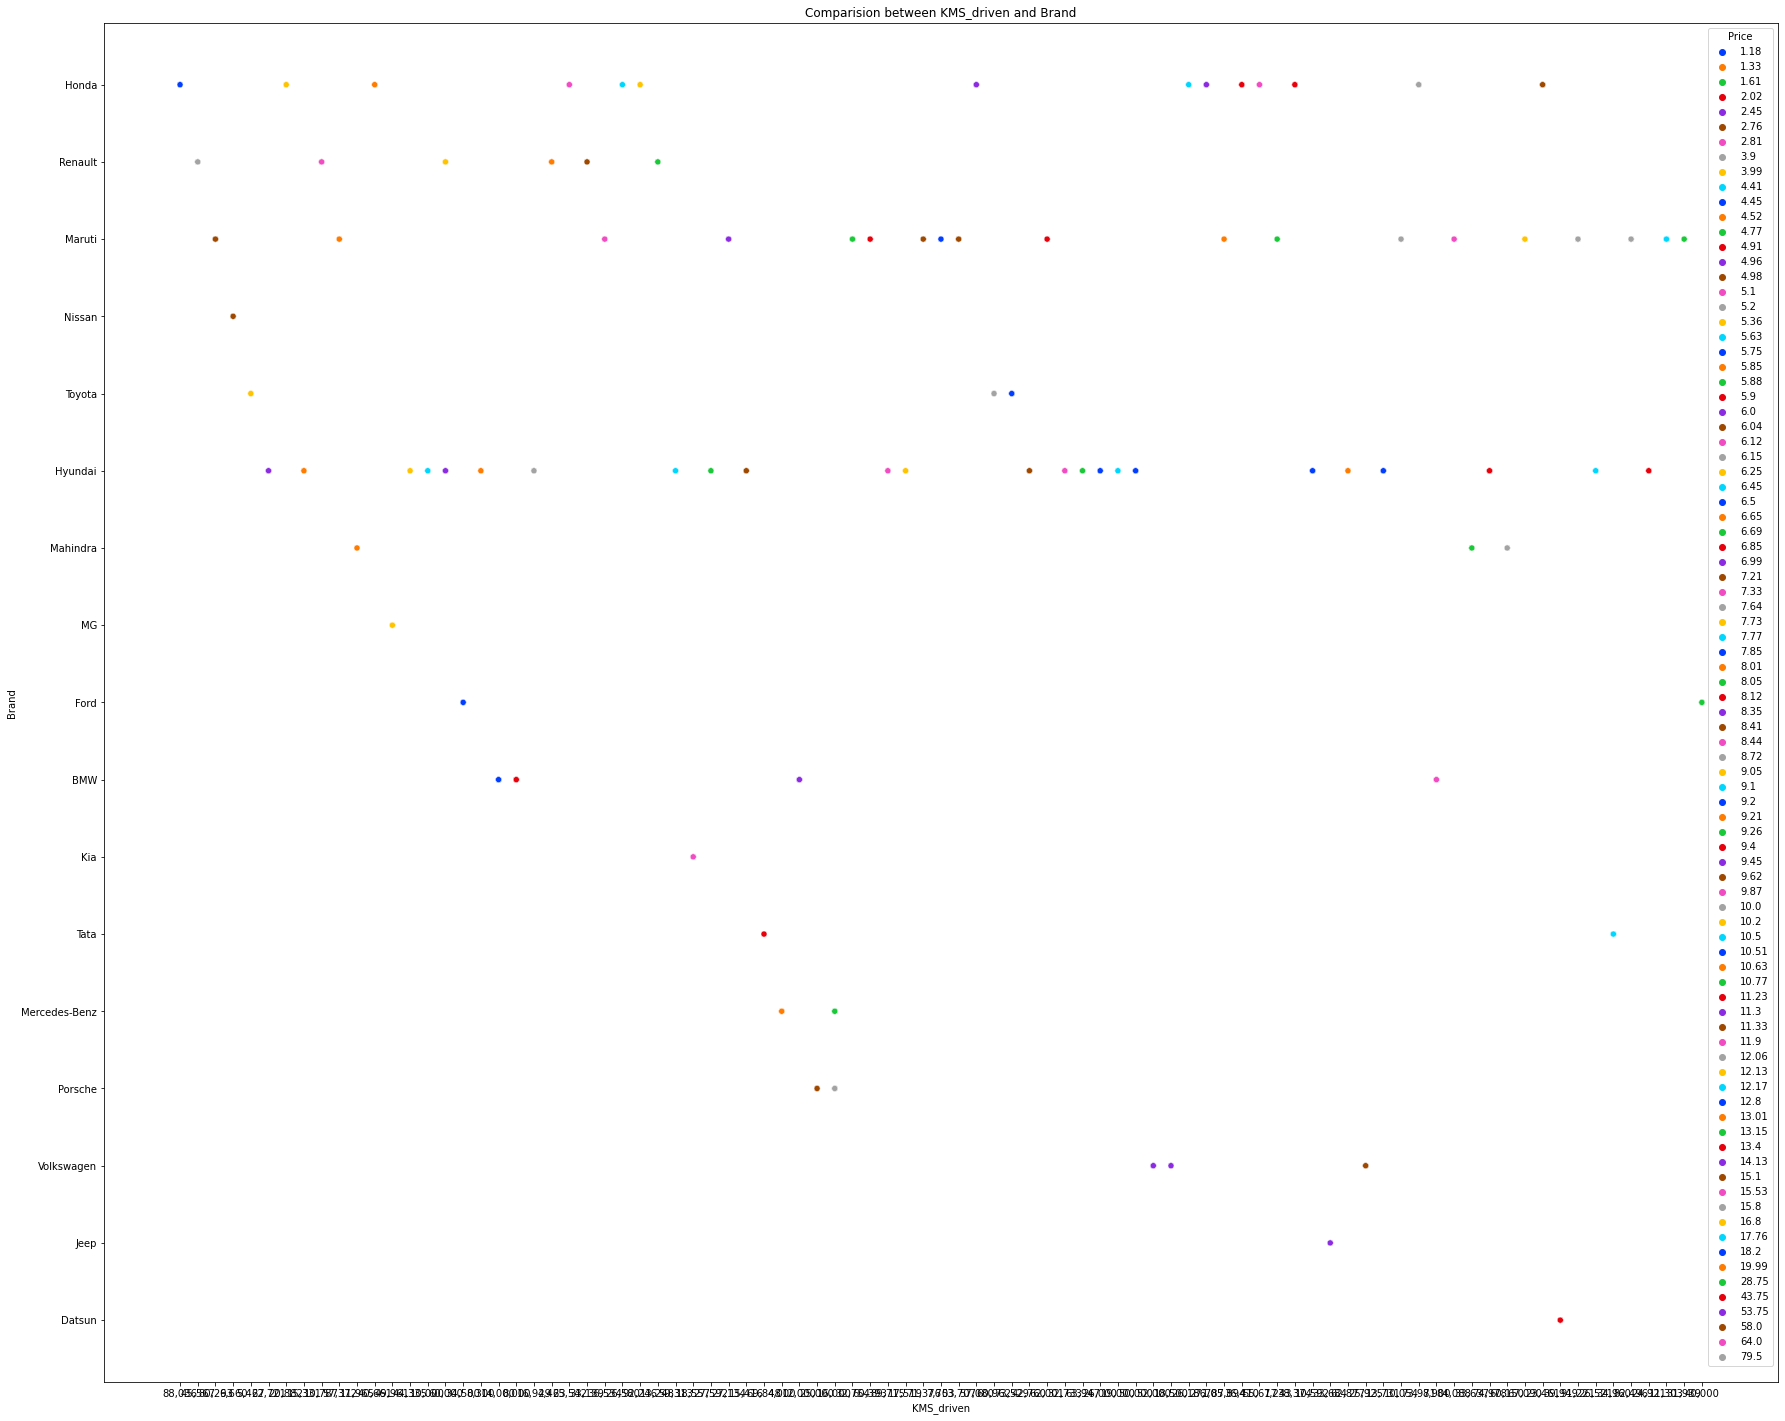

In [27]:
plt.figure(figsize=[30,25])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Brand'],hue=df_uc['Price'],palette="bright");

The above visualization shows the relationship between KMS_driven and Brand in terms of Price. The majority of the cars have kms driven in between 100 & 500. There are a few outliers present in Brand. There is no positive or negative correlation between either Brand or KMS_driven towards price.

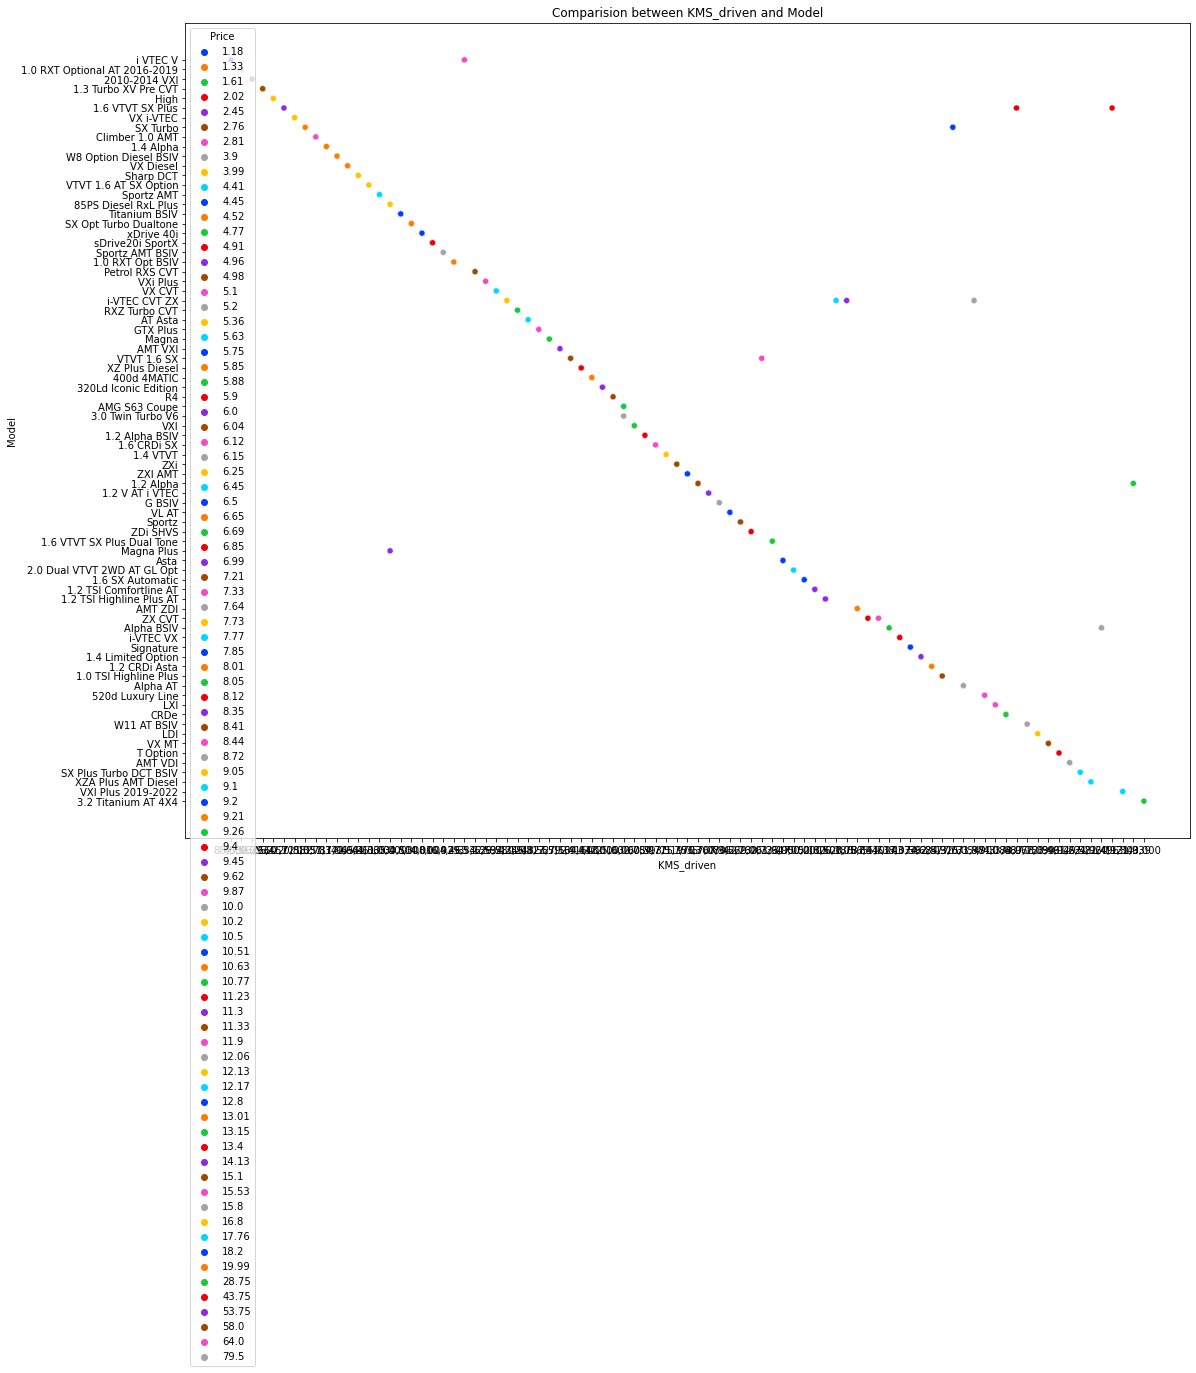

In [28]:
plt.figure(figsize=[18,15])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Model'],hue=df_uc['Price'],palette="bright");

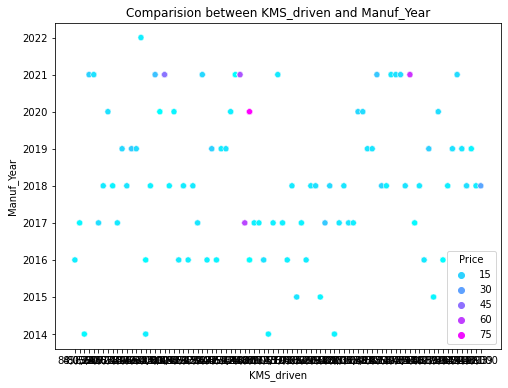

In [29]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Manuf_Year'],hue=df_uc['Price'],palette="cool");

The above visualization shows the relationship between KMS_driven and Manuf_Year in terms of Price. Most of the car's manufacturing years are between 2015 & 2020. There are outliers present in the Manuf_Year column. Manuf_Year is positively correlated with our target Price.

sns.pairplot(df_uc,hue="Price",palette="Spectral") plt.show()

## Encoding

In [30]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant',
       'Manuf_Year'],
      dtype='object')

In [31]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

Label encoder is used to encode the dataframe

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df_uc['Brand'] = le.fit_transform(df_uc['Brand'])
df_uc['Model'] = le.fit_transform(df_uc['Model'])
df_uc['KMS_driven'] = le.fit_transform(df_uc['KMS_driven'])
df_uc['Fuel'] = le.fit_transform(df_uc['Fuel'])
df_uc['Variant'] = le.fit_transform(df_uc['Variant'])

In [34]:
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,3,6.50,73,83,1,1,2016
1,13,3.90,1,51,1,0,2017
2,9,2.76,18,80,1,1,2014
3,11,15.10,9,61,1,0,2021
4,15,10.20,37,53,1,1,2021
...,...,...,...,...,...,...,...
75,0,43.75,76,77,1,0,2021
76,10,1.61,25,13,1,0,2016
77,0,53.75,21,7,0,0,2021
78,12,79.50,19,13,1,0,2020


## OUTLIERS

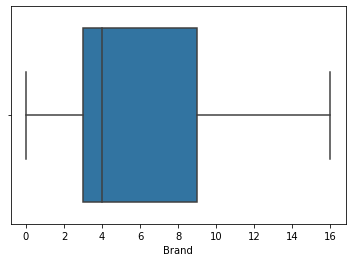

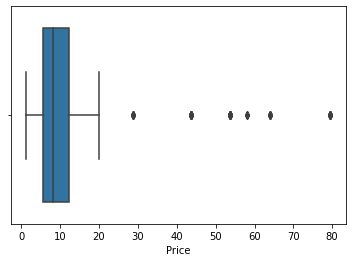

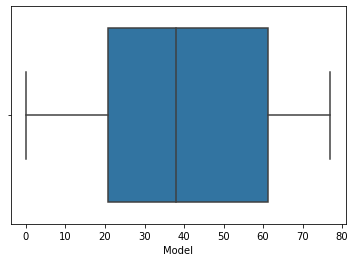

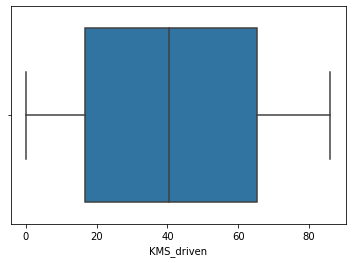

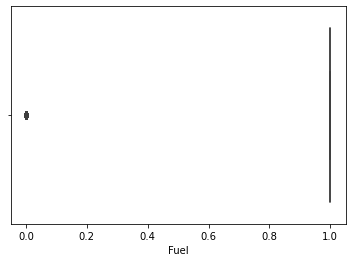

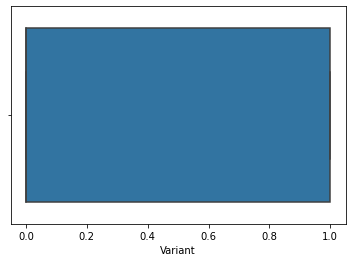

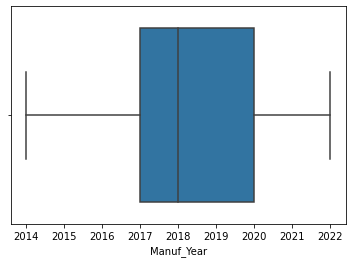

In [35]:
for i in df_uc.columns:
    sns.boxplot(df_uc[i])
    plt.show()

We can see outliers present in the columns : "Brand", "Price", "Variant" & "Manuf_Year". Since Price is our target variable we shall not remove outliers from this column.

### REMOVING OUTLIERS
We shall remove the outliers present in the dataset using Z-Score Method.

In [36]:
df_outliers=df_uc[["Brand", "Variant", "Manuf_Year"]]


In [37]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df_uc[(z<3).all(axis=1)]
df_usedcars

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,3,6.50,73,83,1,1,2016
1,13,3.90,1,51,1,0,2017
2,9,2.76,18,80,1,1,2014
3,11,15.10,9,61,1,0,2021
4,15,10.20,37,53,1,1,2021
...,...,...,...,...,...,...,...
75,0,43.75,76,77,1,0,2021
76,10,1.61,25,13,1,0,2016
77,0,53.75,21,7,0,0,2021
78,12,79.50,19,13,1,0,2020


In [38]:
df_usedcars.shape

(480, 7)

In [39]:
df_uc.shape

(480, 7)

In [40]:
Data_loss=((480-480)/480)*100
Data_loss

0.0

dataloss is 0%

## Skewness

In [41]:
df_skew=['Fuel','Variant']

Brand         0.332237
Price         2.393220
Model         0.091019
KMS_driven    0.102622
Fuel         -1.264933
Variant       0.100439
Manuf_Year   -0.176547
dtype: float64

In [42]:
df_skew=['Fuel','Variant']

In [43]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [44]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)
df_usedcars[df_skew].skew()

Fuel      -1.264933
Variant    0.100439
dtype: float64

## CORRELATION

In [45]:
df_usedcars.corr()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
Brand,1.000000,-0.181121,-0.313710,0.038906,-0.013033,0.057951,-0.157479
Price,-0.181121,1.000000,-0.096793,-0.072130,-0.188181,-0.363662,0.435701
Model,-0.313710,-0.096793,1.000000,0.010100,0.095321,-0.071312,0.220261
KMS_driven,0.038906,-0.072130,0.010100,1.000000,-0.142922,0.122858,-0.208158
Fuel,-0.013033,-0.188181,0.095321,-0.142922,1.000000,0.090746,-0.108943
Variant,0.057951,-0.363662,-0.071312,0.122858,0.090746,1.000000,-0.334588
Manuf_Year,-0.157479,0.435701,0.220261,-0.208158,-0.108943,-0.334588,1.000000


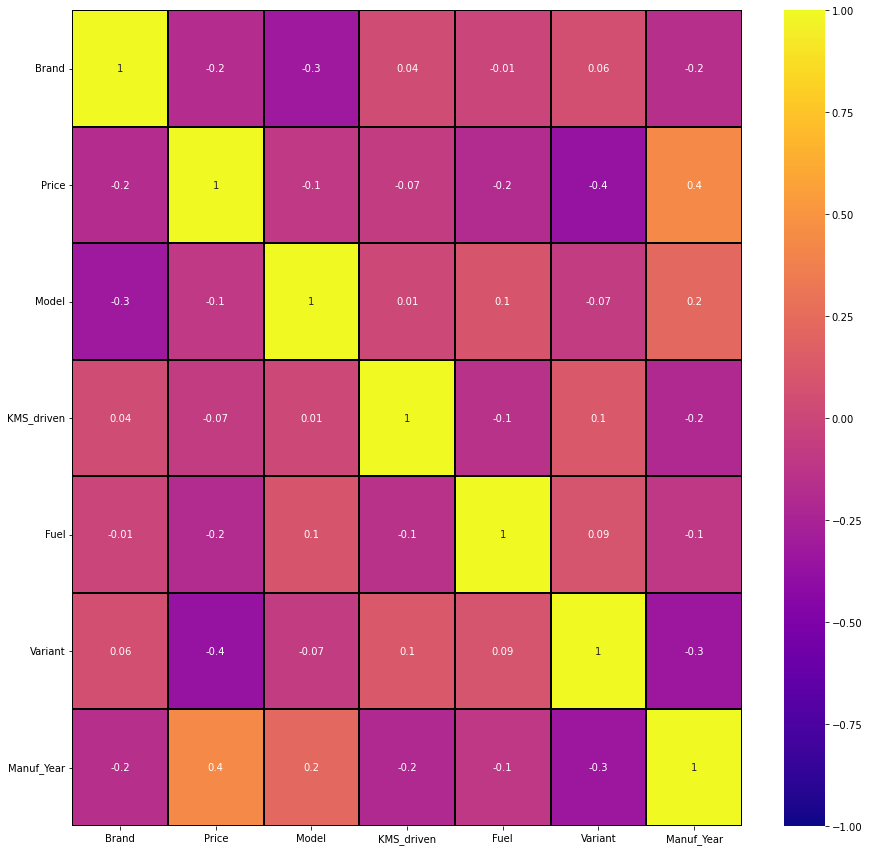

In [46]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="plasma")
plt.yticks(rotation=0);


From the above correlation map, we see that the columns, Variant & Fuel are highly neagtively correlated with our target Price. The column Manuf_Year is highly positively correlated with our target.

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

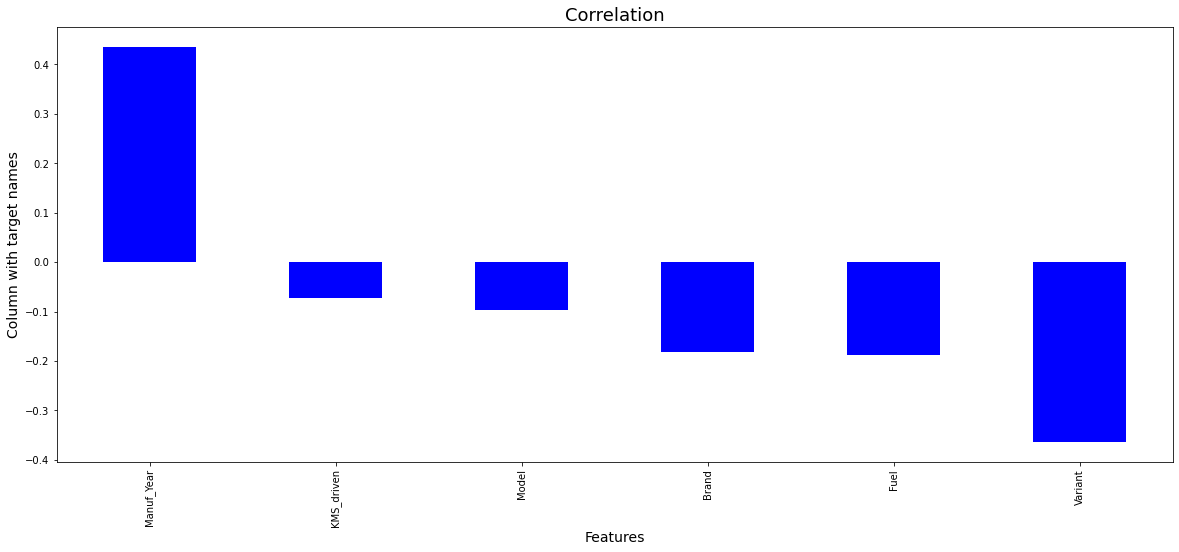

In [47]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Regression model buildng

In [48]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]

In [49]:
x.shape

(480, 6)

In [50]:
y.shape

(480,)

## SCALING

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Brand,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,-0.781734,1.417316,1.574443,0.551677,1.051315,-1.179422
1,1.473268,-1.667997,0.350585,0.551677,-0.951190,-0.672144
2,0.571267,-0.939521,1.459707,0.551677,1.051315,-2.193979
3,1.022267,-1.325185,0.733040,0.551677,-0.951190,1.356969
4,1.924268,-0.125341,0.427076,0.551677,1.051315,1.356969
...,...,...,...,...,...,...
475,-1.458234,1.545870,1.344970,0.551677,-0.951190,1.356969
476,0.796767,-0.639560,-1.102748,0.551677,-0.951190,-1.179422
477,-1.458234,-0.810966,-1.332221,-1.812654,-0.951190,1.356969
478,1.247768,-0.896669,-1.102748,0.551677,-0.951190,0.849691


### VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.120146,Brand
1,1.172439,Model
2,1.089637,KMS_driven
3,1.066936,Fuel
4,1.135362,Variant
5,1.253131,Manuf_Year


VIF values are below 10 so there is no Multicollinearity in the columns

### Best Random State

In [53]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [54]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.9866743740699901  on Random State : 75


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [56]:
x_train.shape

(336, 6)

In [57]:
x_test.shape

(144, 6)

In [58]:
y_train.shape

(336,)

In [59]:
y_test.shape

(144,)

### LINEAR REGRESSION

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.364272337866851
Mean absolute error:  9.11220546650663
Mean squared error:  250.88030113317393
Root Mean squared error:  15.839201404527122


### DECISION TREE REGRESSOR

In [62]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.9999989864048165
Mean absolute error:  0.003333333333333466
Mean squared error:  0.00040000000000000663
Root Mean squared error:  0.020000000000000167


### KNN REGRESSOR

In [63]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.9866743740699901
Mean absolute error:  1.0539166666666664
Mean squared error:  5.25875661111111
Root Mean squared error:  2.2931979005552727


### SVR

In [64]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.13431460178662524
Mean absolute error:  8.653995997988055
Mean squared error:  341.6296416324187
Root Mean squared error:  18.483225953074825


### RANDOM FOREST REGRESSOR

In [65]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.9996881421689744
Mean absolute error:  0.19987152777777886
Mean squared error:  0.12306997354166654
Root Mean squared error:  0.3508133029713476


### GRADIENT BOOST REGRESSOR

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))


R2_Score:  0.9975316112883751
Mean absolute error:  0.7368825051121103
Mean squared error:  0.9741122499031507
Root Mean squared error:  0.9869712507987002


### XGBOOST REGRESSOR

In [67]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  0.9999999860758668
Mean absolute error:  0.0011895434392823325
Mean squared error:  5.494948423232071e-06
Root Mean squared error:  0.0023441306327148387


### Cross VALIDATION REGRESSOR

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.12208497547119701


In [70]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.8052540434619815


In [71]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.4054370279634406


In [72]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.2511977061815049


In [73]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.8869533420940373


In [74]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.889181622745683


In [76]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.8418007623272745


Cross validation score of this model is:  0.5793915821814158
The highest cross validation score belonmgs to Extra Trees Regressor, followed by Gradient Boosting Regressor & Random Forest Regressor.

The cross validation scores of KNearest Neighbors Regressor, Decision Tree Regressor & Linear Regression Model are negative and are the lowest of all scores

### HYPER METER TUNING

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_xgb = GridSearchCV(xgb, param_grid = parameters, cv = 5)

In [79]:
grid_xgb.fit(x_train, y_train)

[22:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[22:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1]})

In [80]:
grid_xgb.best_params_

{'criterion': 'squared_error',
 'max_features': 'auto',
 'n_estimators': 1000,
 'n_jobs': -2}

In [81]:
Best_model = XGBRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

[22:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2_Score:  0.9950766742564324
Mean absolute error:  0.9052403370208211
Mean squared error:  1.9429159979894821
Root Mean squared error:  1.3938852169348386


After hyperparameter tuning we got 99% score

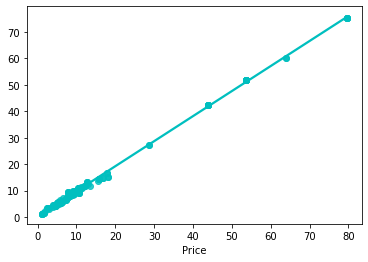

In [83]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

### SAVING THE MODEL

In [84]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [85]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 4.172507 ,  5.636639 ,  3.5584161,  4.7593017, 14.790923 ,
        5.771717 , 42.33826  ,  4.7593017, 60.23857  , 42.33826  ,
       51.759407 ,  8.940445 ,  9.469426 , 14.3046255,  8.44551  ,
        1.61419  ,  4.7593017,  8.894967 , 13.35648  ,  3.5584161,
       75.07951  ,  8.502036 ,  5.840729 ,  8.421373 ,  3.682687 ,
        4.384946 ,  6.6052637,  8.421373 ,  1.61419  ,  9.469426 ,
        9.963887 , 13.35648  ,  5.2828712,  9.469426 , 13.725143 ,
        4.7593017, 14.3046255,  8.53776  ,  5.636639 , 51.759407 ,
        1.61419  ,  8.44551  ,  6.6052637,  7.1980834, 10.834705 ,
        5.2828712,  4.172507 , 75.07951  ,  8.178041 , 11.595261 ,
        9.754056 ,  4.172507 ,  1.2089698,  7.9279447,  8.178041 ,
       10.834705 , 75.07951  ,  8.178041 ,  7.7179303, 75.07951  ,
        6.5106573, 75.07951  ,  5.9889364,  7.1980834, 51.759407 ,
       11.626346 , 42.33826  , 10.834705 , 42.33826  ,  1.4272935,
        5.141845 ,  1.2089698, 51.759407 ,  7.070155 ,  9.5555

In [86]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
Predicted,4.172507,5.636639,3.558416,4.759302,14.790923,5.771717,42.338261,4.759302,60.238571,42.338261,...,1.20897,10.834705,16.627003,42.338261,3.271647,11.232693,1.20897,11.075769,9.974046,2.165074
Actual,4.450000,5.200000,2.450000,4.410000,16.800000,6.250000,43.750000,4.410000,64.000000,43.750000,...,1.18000,10.630000,17.760000,43.750000,2.760000,11.300000,1.18000,11.230000,10.000000,2.020000


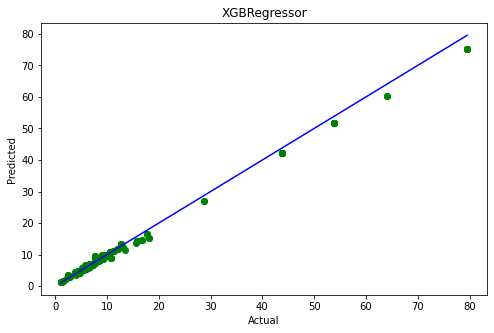

In [87]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, c='green')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("XGBRegressor")
plt.show()